#  PARTIE 1 : EDA et prétraitement des données

## Import librairies

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## Lecture des données

In [261]:
dataset = pd.read_csv('./src/conversion_data_train.csv')
dataset.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [262]:
print(dataset.shape, '\n')
dataset.info()

(284580, 6) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


## Nettoyage des données

### Données manquantes

Le jeu de données ne présente pas de données manquantes.

In [263]:
print('Number of missing values per column:')
dataset.isna().sum()

Number of missing values per column:


country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

### Valeurs aberrantes

Nous observons des valeurs aberrantes pour les colonnes age et total_pages_visited.

Elles représentent 6131 observations soit 2.15% du jeux de données.

Nous supprimons ces données aberrantes.

In [264]:
dataset.describe(include='all')

,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


Interval: [5.76, 55.36]


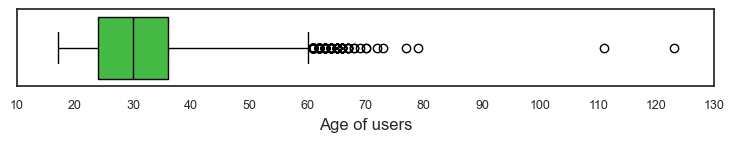

In [265]:
mean_val = dataset['age'].mean()
std_val = dataset['age'].std()
print(f'Interval: [{round((mean_val - 3*std_val),2)}, {round((mean_val + 3*std_val),2)}]')

fig, ax = plt.subplots(figsize=(9, 1))
sns.boxplot(x=dataset['age'], ax=ax, palette=['limegreen'], linecolor='black', whis=2)
plt.xticks([i for i in range(10,131,10)], fontsize=9)
plt.xlabel('Age of users')
plt.show()

Interval: [-5.15, 14.9]


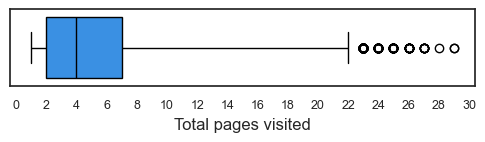

In [266]:
mean_val = dataset['total_pages_visited'].mean()
std_val = dataset['total_pages_visited'].std()
print(f'Interval: [{round((mean_val - 3*std_val),2)}, {round((mean_val + 3*std_val),2)}]')

fig, ax = plt.subplots(figsize=(6, 1))
sns.boxplot(x=dataset['total_pages_visited'], ax=ax, palette=['dodgerblue'], linecolor='black', whis=3)
plt.xticks([i for i in range(0,31,2)], fontsize=9)
plt.xlabel('Total pages visited')
plt.show()

### Suppression des valeurs aberrantes

In [267]:
rows_to_drop = dataset[(dataset['age'] > 55.36) | (dataset['total_pages_visited'] > 14.9)].index.tolist()
print('Number of outliers:', len(rows_to_drop))
print('Percentage of outliers:', round(len(rows_to_drop)/dataset.shape[0]*100,2), '%')

Number of outliers: 6131
Percentage of outliers: 2.15 %


In [268]:
dataset_clean = dataset.copy()
dataset_clean = dataset_clean.drop(rows_to_drop, axis=0)
dataset_clean.reset_index(drop=True, inplace=True)
dataset_clean.shape

(278449, 6)

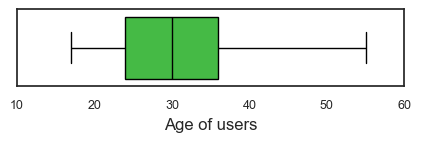

In [269]:
fig, ax = plt.subplots(figsize=(5, 1))
sns.boxplot(x=dataset_clean['age'], ax=ax, palette=['limegreen'], linecolor='black', whis=2)
plt.xticks([i for i in range(10,61,10)], fontsize=9)
plt.xlabel('Age of users')
plt.show()

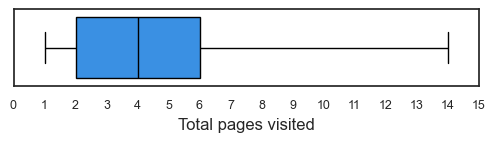

In [270]:
fig, ax = plt.subplots(figsize=(6, 1))
sns.boxplot(x=dataset_clean['total_pages_visited'], ax=ax, palette=['dodgerblue'], linecolor='black', whis=2)
plt.xticks([i for i in range(0,16,1)], fontsize=9)
plt.xlabel('Total pages visited')
plt.show()

## Enregistrement du dataset nettoyé

In [271]:
dataset_clean.to_csv('./src/dataset_for_ml.csv', index=False)

## Statistiques basiques

In [272]:
dataset_clean.describe(include='all')

,country,age,new_user,source,total_pages_visited,converted
count,278449,278449.000000,278449.000000,278449,278449.000000,278449.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,156176,NaN,NaN,136451,NaN,NaN
mean,NaN,30.525166,0.691538,NaN,4.641773,0.016495
std,NaN,8.106654,0.461859,NaN,2.879495,0.127369
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,6.000000,0.000000


- Les utilisateurs proviennent de 4 pays : États-Unis, Chine, Royaume-Uni et Allemagne

- Et de 3 sources : le référencement naturel, la publicité (référencement payant), et directement via le site web

- L'âge moyen des utilisateurs est de 30 ans

- La moyenne de pages visitées est de 4 pages

- Un total de 1,29 millions de pages ont été visitées

- Il y a eu un total de 4593 conversions soit un taux de conversion de 1.65%

- Le site web a enregistré environ 190 000 nouveaux utilisateurs

In [273]:
dataset_clean['country'].value_counts() 

country
US         156176
China       68701
UK          42308
Germany     11264
Name: count, dtype: int64

In [274]:
dataset_clean['source'].value_counts()

source
Seo       136451
Ads        78162
Direct     63836
Name: count, dtype: int64

In [275]:
mask_c = dataset_clean['converted'] == 1 
mask_n = dataset_clean['new_user'] == 1

print('Average number of pages visited:', dataset_clean['total_pages_visited'].median())
print('Total number of pages visited:', dataset_clean['total_pages_visited'].sum())
print('Total number of new users:', len(dataset_clean[dataset_clean['new_user'] == 1]))
print('Total number of conversions:', dataset_clean['converted'].sum())
print('Conversion rate:', round(dataset_clean['converted'].sum()/dataset_clean.shape[0]*100,2), '%')
print('- Existing user converted:', len(dataset_clean[mask_c & ~mask_n]))
print('- New user converted:', len(dataset_clean[mask_c & mask_n])) 

Average number of pages visited: 4.0
Total number of pages visited: 1292497
Total number of new users: 192558
Total number of conversions: 4593
Conversion rate: 1.65 %
- Existing user converted: 3271
- New user converted: 1322


## Visualisations

Le jeu de données entier comporte près de 280 000 observations. 

Nous prenons un échantillon de 50 000 observations pour réaliser les visualisations.

In [276]:
dataset_sample = dataset_clean.sample(50000)

Mean age of users: 31
Youngest user is: 17
Oldest user is: 55


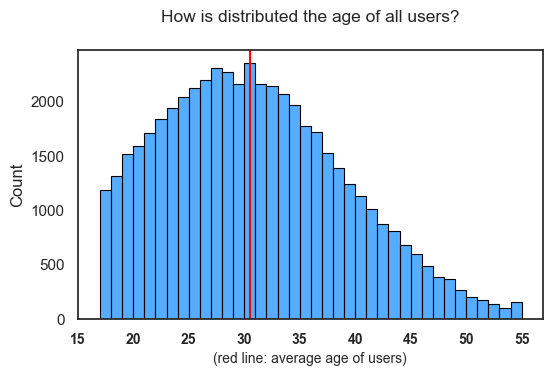

In [295]:
print('Mean age of users:', round(dataset_sample['age'].mean()))
print('Youngest user is:', round(dataset_sample['age'].min()))
print('Oldest user is:', round(dataset_sample['age'].max()))

sns.set(rc={'figure.figsize':(6, 3.5)}, style='white')
sns.histplot(data=dataset_sample, x="age", bins=38, color='dodgerblue', edgecolor='black')
plt.title('How is distributed the age of all users?', fontsize=12.5, pad=20)
plt.axvline(dataset_sample['age'].mean(), color='red')
plt.ylabel('Count')
plt.xlabel('(red line: average age of users)', fontsize=10)
plt.xticks([i for i in range(15,60,5)], fontsize=10, fontweight='bold')
plt.show()

Mean age of users that subscribed: 26


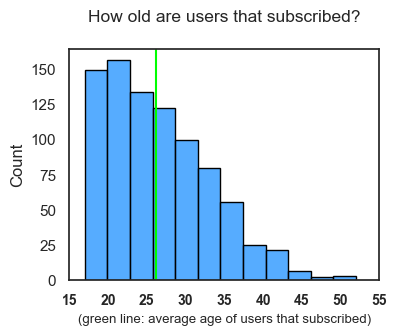

In [294]:
print('Mean age of users that subscribed:', round(dataset_sample[dataset_sample['converted']==1]['age'].mean()))
sns.set(rc={'figure.figsize':(4, 3)}, style='white')
sns.histplot(data=dataset_sample[dataset_sample['converted']==1], x="age", bins=12, color='dodgerblue', edgecolor='black')
plt.axvline(dataset_sample[dataset_sample['converted']==1]['age'].mean(), color='lime')
plt.title('How old are users that subscribed?', fontsize=12.5, pad=20)
plt.ylabel('Count')
plt.xlabel('(green line: average age of users that subscribed)', fontsize=9.5)
plt.xticks([i for i in range(15,60,5)], fontsize=10, fontweight='bold')
plt.show()

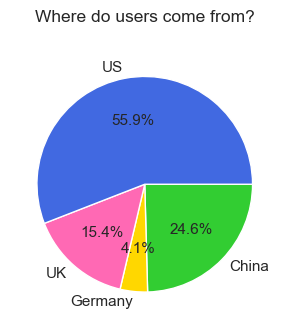

In [279]:
count_country = dataset_sample['country'].value_counts().to_frame().reset_index()
count_country = count_country.sort_values(by='country')

sns.set(rc={'figure.figsize':(3.5, 3.5)}, style='white')
colors = ['limegreen','gold','hotpink','royalblue']
plt.pie(count_country['count'],  labels = count_country['country'], autopct = '%1.1f%%', startangle = 0, counterclock = False, labeldistance=1.1, colors = colors, textprops = {'fontsize':11} )
plt.title('Where do users come from?', fontsize=12.5, pad=20)
plt.show()

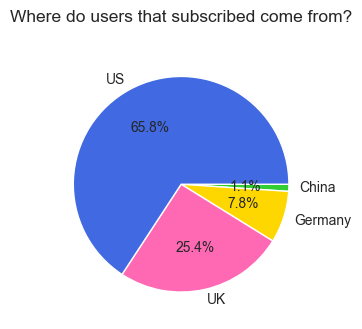

In [280]:
count_country = dataset_sample[dataset_sample['converted']==1]['country'].value_counts().to_frame().reset_index()
count_country = count_country.sort_values(by='country')

sns.set(rc={'figure.figsize':(3.5, 3.5)}, style='white')
colors = ['limegreen','gold','hotpink','royalblue']
plt.pie(count_country['count'],  labels = count_country['country'], autopct = '%1.1f%%', startangle = 0, counterclock = False, labeldistance=1.1, colors = colors, textprops = {'fontsize':10} )
plt.title('Where do users that subscribed come from?', fontsize=12.5, pad=20)
plt.show()

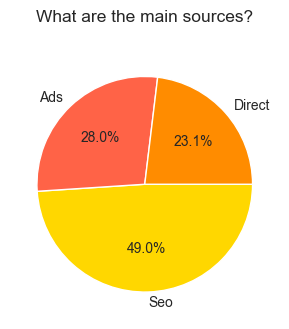

In [281]:
count_source = dataset_sample['source'].value_counts().to_frame().reset_index()

sns.set(rc={'figure.figsize':(3.5, 3.5)}, style='white')
colors = ['gold', 'tomato', 'darkorange']
plt.pie(count_source['count'],  labels = count_source['source'], autopct = '%1.1f%%', startangle = 0, counterclock = False, labeldistance=1.1, colors = colors, textprops = {'fontsize':10} )
plt.title('What are the main sources?', fontsize=12.5, pad=20)
plt.show()

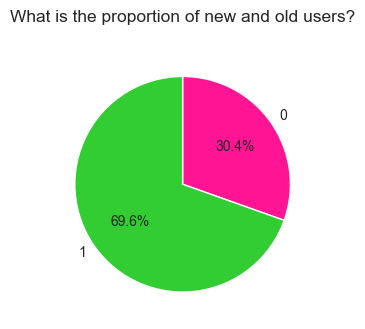

In [282]:
count_newusers = dataset_sample['new_user'].value_counts().to_frame().reset_index()
count_newusers = count_newusers.sort_values(by='new_user')

sns.set(rc={'figure.figsize':(3.5, 3.5)}, style='white')
colors = ['deeppink', 'limegreen']
plt.pie(count_newusers['count'],  labels = count_newusers['new_user'], autopct = '%1.1f%%', startangle = 90, counterclock = False, labeldistance=1.1, colors = colors, textprops = {'fontsize':10})
plt.title('What is the proportion of new and old users?', fontsize=12.5, pad=20)
plt.show()

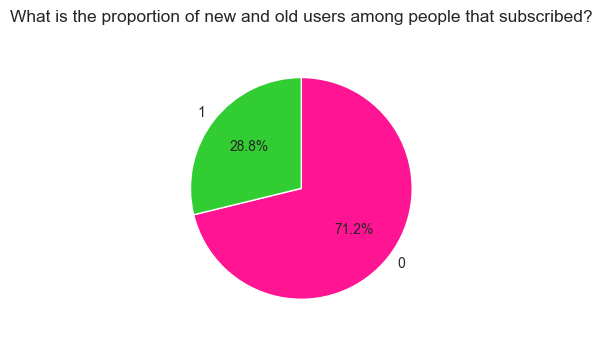

In [283]:
count_newusers = dataset_sample[dataset_sample['converted']==1]['new_user'].value_counts().to_frame().reset_index()
count_newusers = count_newusers.sort_values(by='new_user')

sns.set(rc={'figure.figsize':(9, 3.6)}, style='white')
colors = [ 'deeppink', 'limegreen']
plt.pie(count_newusers['count'],  labels = count_newusers['new_user'], autopct = '%1.1f%%', startangle = 90, counterclock = False, labeldistance=1.1, colors = colors, textprops = {'fontsize':10})
plt.title('What is the proportion of new and old users among people that subscribed?', fontsize=12.5, pad=20)
plt.show()

Average pages visited: 4.0


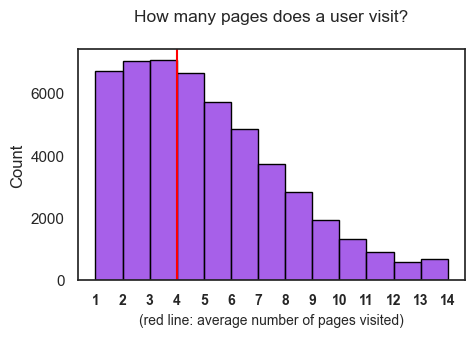

In [292]:
print('Average pages visited:',dataset_sample['total_pages_visited'].median())

sns.set(rc={'figure.figsize':(5, 3)}, style='white')
sns.histplot(data=dataset_sample, x="total_pages_visited", bins=13, color='blueviolet', edgecolor='black')
plt.axvline(dataset_sample['total_pages_visited'].median(), color='red')
plt.title('How many pages does a user visit?', fontsize=12.5, pad=20)
plt.ylabel('Count')
plt.xlabel('(red line: average number of pages visited)', fontsize=10)
plt.xticks([i for i in range(1,15,1)], fontsize=10, fontweight='bold')
plt.show()

Number of pages visited when subscribed: 12.0


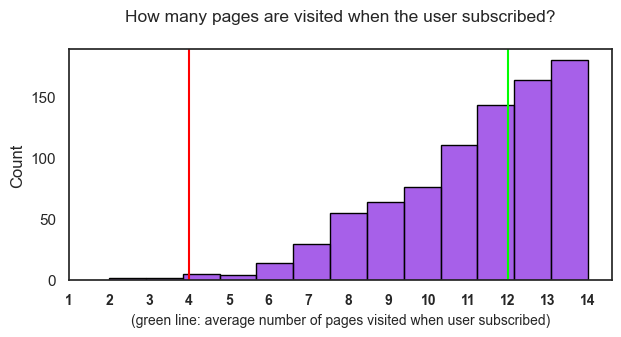

In [293]:
print('Number of pages visited when subscribed:', dataset_sample[dataset_sample['converted']==1]['total_pages_visited'].median())

sns.set(rc={'figure.figsize':(7, 3)}, style='white')
sns.histplot(data=dataset_sample[dataset_sample['converted']==1], x="total_pages_visited", bins=13, color='blueviolet', edgecolor='black')
plt.axvline(dataset_sample['total_pages_visited'].median(), color='red')
plt.axvline(dataset_sample[dataset_sample['converted']==1]['total_pages_visited'].median(), color='lime')
plt.title('How many pages are visited when the user subscribed?', fontsize=12.5, pad=20)
plt.ylabel('Count')
plt.xlabel('(green line: average number of pages visited when user subscribed)', fontsize=10)
plt.xticks([i for i in range(1,15,1)], fontsize=10, fontweight='bold')
plt.show()

### Résultats :

- Age : 

    - On observe que les utilisateurs ayant souscrit à la newsletter sont plus jeunes que le groupe total (moyenne d'âge de 26 ans contre 31 ans).

- Pays :

    - Les utilisateurs qui souscrivent sont majoritairement américains et anglais. Ils représentent ensemble plus de 90% des souscrits.

    - Bien que dans le groupe total il y ait près d'un quart de chinois, ceux-ci sont sous-représentés dans le groupe de souscrits : seulement 1.1% des utilisateurs ayant souscrit sont chinois alors qu'ils sont 24.6% à avoir visité le site web.

    - En revanche, bien que 4.1% des utilisateurs sont allemands, ils représentent une part plus importante dans le total des souscrits de 7.8%.

- Source :

    - La principale source d'arrivée des utilisateurs est le référencement naturel du site web (presque la moitié des visites). Il n'y a pas de différence notable entre le groupe total et les utilisateurs ayant souscrit.

    - 70% des visiteurs sont nouveaux, ils n'ont jamais visité le site auparavant. 30% des visiteurs sont des personnes qui reviennent sur le site.

    - Cette proportion est inversée pour les personnes qui souscrivent à la newsletter : 70% des personnes qui souscrivent sont déjà venues alors que 30% des personnes qui souscrivent sont nouvelles --> elles sont donc plus nombreuses à souscrire lorsqu'elles connaissent déjà le site.

- Pages visitées :

    - En moyenne un visiteur visite 4 pages. 

    - Ce nombre augmente considérablement lorsque la personne a souscrit à la newsletter. Ainsi une personne qui souscrit visite en moyenne 12 pages soit 3 fois plus que le groupe total.



### Récapitulatif :

- Les utilisateurs qui s'inscrivent : 

    - sont plus jeunes que le groupe total ;

    - proviennent davantage de l'occident plutôt que de Chine ;

    - sont davantage des utilisateurs qui reviennent plutôt que des nouveaux utilisateurs ;
    
    - visitent 3 fois plus de pages que le groupe total.